In [1]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib.table import table
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import jinja2
import re
import tabulate
import ridgeplot as rg
import nbformat
from sympy import true

In [2]:
#Justin Li - Feb. 19 2026
# This is an exploratory EDA of the following variables: "CaseYear", "CrashDate","CrashSeverity", "MaxInjurySeverity","NumberOfFatalities","NumberOfInjuries","NumberOfOtherInjuries","NumberOfVehicles", "CommercialVehicleCrashInd", "isLargeTruckCrash", and if I can get to it
df = pd.read_csv("2012-24_Crash_Events.csv")
df.columns


/tmp/ipykernel_21113/1922831206.py:3: DtypeWarning: Columns (0: CaseNumber) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2012-24_Crash_Events.csv")


Index(['CaseNumber', 'CaseYear', 'CrashDate', 'CrashTime',
       'CrashTimeFormatted', 'CrashTypeCde', 'CrashType', 'CollisionType',
       'CrashSeverity', 'LightCondition', 'WeatherCondition',
       'RoadwayAccessControlCde', 'RoadwayCharacteristic',
       'RoadSurfaceCondition', 'TrafficControl', 'TrafficWay',
       'MaxInjurySeverity', 'NumberOfFatalities', 'NumberOfInjuries',
       'NumberOfSeriousInjuries', 'NumberOfOtherInjuries', 'NumberOfVehicles',
       'PoliceDept', 'ReportingAgency', 'Precinct',
       'CommercialVehicleCrashInd', 'PPDRCode', 'NonReportable',
       'ReviewedIndicator', 'DMVInsertDate', 'CountyFIPS', 'CountyName',
       'MuniFIPS', 'CityTownName', 'OnStreet', 'ClosestCrossStreet',
       'MasterIntersectionId', 'IntersectionIndicator', 'ReferenceMarker',
       'DistanceFromIntersection', 'DirectionFromIntersection', 'UTMEasting',
       'UTMNorthing', 'NonPublicWayCode', 'ACCESS_CONTROL', 'DIVIDED',
       'FUNCTIONAL_CLASS', 'MAINT_JURISDICTION_TYP

In [3]:
summary_table = df[["CaseYear", "CrashDate","CrashSeverity", "MaxInjurySeverity","NumberOfFatalities","NumberOfInjuries","NumberOfSeriousInjuries","NumberOfOtherInjuries","NumberOfVehicles", "CommercialVehicleCrashInd", "isLargeTruckCrash"]]
summary_table.head()

#load data


,CaseYear,CrashDate,CrashSeverity,MaxInjurySeverity,NumberOfFatalities,NumberOfInjuries,NumberOfSeriousInjuries,NumberOfOtherInjuries,NumberOfVehicles,CommercialVehicleCrashInd,isLargeTruckCrash
0,2021,2021-01-05,PROPERTY DAMAGE,NaN,0,0,0,0,2,0,0
1,2021,2021-01-09,INJURY,C - POSSIBLE INJURY,0,1,0,1,2,0,1
2,2021,2021-01-09,PROPERTY DAMAGE,NaN,0,0,0,0,2,0,0
3,2021,2021-01-05,PROPERTY DAMAGE,NaN,0,0,0,0,2,0,0
4,2021,2021-01-05,PROPERTY DAMAGE,NaN,0,0,0,0,2,1,1


In [4]:

summary_stat = summary_table[["CaseYear", "CrashSeverity", "MaxInjurySeverity","NumberOfFatalities","NumberOfInjuries","NumberOfSeriousInjuries","NumberOfOtherInjuries","NumberOfVehicles", "CommercialVehicleCrashInd", "isLargeTruckCrash"]].describe()

print(summary_table['MaxInjurySeverity'].unique())
print(summary_table['CrashSeverity'].unique())
summary_stat
#initial summary statistics where applicable
#note: i think we should do some feature engineering on the crashseverity and maxinjuryseverity variables. like, turn those letters into numbers, maybe.
#% of cases which involve commercial vehicles, bar graph of the most severe type of crash and injury severity

<StringArray>
[                  nan, 'C - POSSIBLE INJURY',          'B - INJURY',
  'A - SERIOUS INJURY',           'K - FATAL',         'U - UNKNOWN']
Length: 6, dtype: str
<StringArray>
['PROPERTY DAMAGE', 'INJURY', 'FATAL', nan]
Length: 4, dtype: str


,CaseYear,NumberOfFatalities,NumberOfInjuries,NumberOfSeriousInjuries,NumberOfOtherInjuries,NumberOfVehicles,CommercialVehicleCrashInd,isLargeTruckCrash
count,291634.000000,291634.000000,291634.000000,291634.000000,291634.000000,291634.000000,291634.000000,291634.000000
mean,2017.699140,0.002006,0.230957,0.021325,0.208408,1.839268,0.010256,0.035260
std,3.680505,0.046693,0.579632,0.164508,0.543614,0.545699,0.100751,0.184436
min,2012.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,2018.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,2021.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,2024.000000,3.000000,30.000000,13.000000,17.000000,11.000000,1.000000,1.000000


In [5]:
summary_table_sorted_year = summary_table.sort_values('CrashDate')
summary_table_sorted_year.head()
# sort by year


,CaseYear,CrashDate,CrashSeverity,MaxInjurySeverity,NumberOfFatalities,NumberOfInjuries,NumberOfSeriousInjuries,NumberOfOtherInjuries,NumberOfVehicles,CommercialVehicleCrashInd,isLargeTruckCrash
60142,2012,2012-01-01,PROPERTY DAMAGE,NaN,0,0,0,0,1,0,0
59737,2012,2012-01-01,PROPERTY DAMAGE,NaN,0,0,0,0,1,0,0
60068,2012,2012-01-01,INJURY,C - POSSIBLE INJURY,0,1,0,1,2,0,0
59176,2012,2012-01-01,PROPERTY DAMAGE,NaN,0,0,0,0,2,0,0
58942,2012,2012-01-01,INJURY,C - POSSIBLE INJURY,0,1,0,1,2,0,0


In [6]:
# function to quickly make summary stats of each year for non-categorical values

def yearlist (startyear,endyear):
    years=[]
    for year in range(startyear,endyear+1):
        years.append(year)
    return years
def yearstats (frame, column, years):
    yearsums = []
    yearmeans = []
    yearprops = []
    casecounts = []

    for year in years:
        frameyear = frame[frame['CaseYear'] == year]
        casecount = frameyear.shape[0]
        casecounts.append(casecount)
        yearsums.append(frameyear[column].sum())
        yearmeans.append(frameyear[column].mean())
        frameyear = frameyear[frameyear[column] > 0]
        yearprops.append(frameyear.shape[0]/casecount)
    return yearsums, yearmeans, yearprops, casecounts

def yearagg (frame, column, year):
    return frame[frame["CaseYear"] == year][column].values



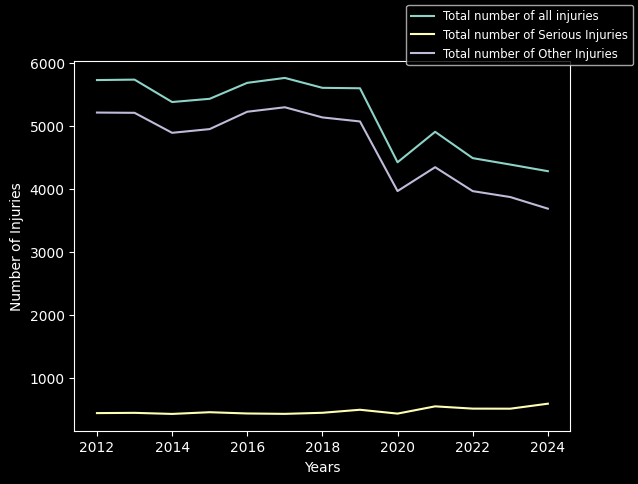

In [7]:
# a plot of serious injuries in a year vs. injuries, etc.
years = yearlist(2012,2024)
Injuries_yearsum, Injuries_yearmeans, Injuries_yearprops,Injuries_casecount = yearstats(summary_table_sorted_year,"NumberOfInjuries",years)
SeriousInjuries_yearsum, SeriousInjuries_yearmeans, SeriousInjuries_yearprops,SeriousInjuries_casecount = yearstats(summary_table_sorted_year,"NumberOfSeriousInjuries",years)
OtherInjuries_yearsum, OtherInjuries_yearmeans, OtherInjuries_yearprops,OtherInjuries_casecount = yearstats(summary_table_sorted_year,"NumberOfOtherInjuries",years)


plt.plot(years, Injuries_yearsum, label="Total number of all injuries")
plt.plot(years, SeriousInjuries_yearsum, label="Total number of Serious Injuries")
plt.plot(years, OtherInjuries_yearsum, label="Total number of Other Injuries")
plt.figlegend(fontsize='small')
plt.xlabel("Years")
plt.ylabel("Number of Injuries")
plt.show()

In [12]:
#ridgeplot of injuries

yearagg_injuries = []

for year in years:
    yearagg_injuries.append(yearagg(summary_table_sorted_year,"NumberOfInjuries",year))

ridge_injuries = rg.ridgeplot (samples = yearagg_injuries)
ridge_injuries.show()
# Most crashes don't result in many injures, but a few outliers...

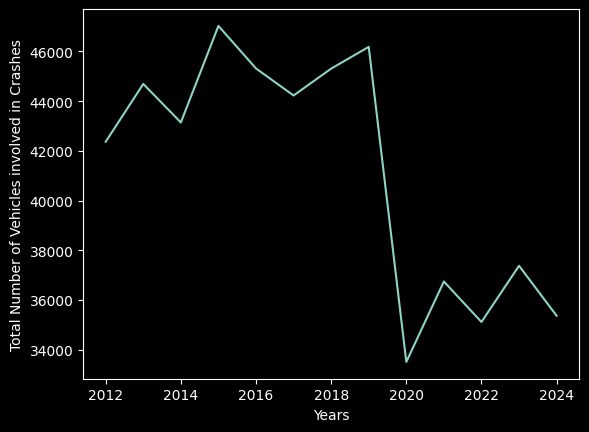

In [11]:
#a plot of the total # of cars involved in a crash over the years
TotalVics_yearsum, TotalVics_yearmeans, TotalVics_yearprops,TotalVics_casecount = yearstats(summary_table_sorted_year,"NumberOfVehicles",years)

plt.plot(years, TotalVics_yearsum)
plt.xlabel("Years")
plt.ylabel("Total Number of Vehicles involved in Crashes")
plt.show()


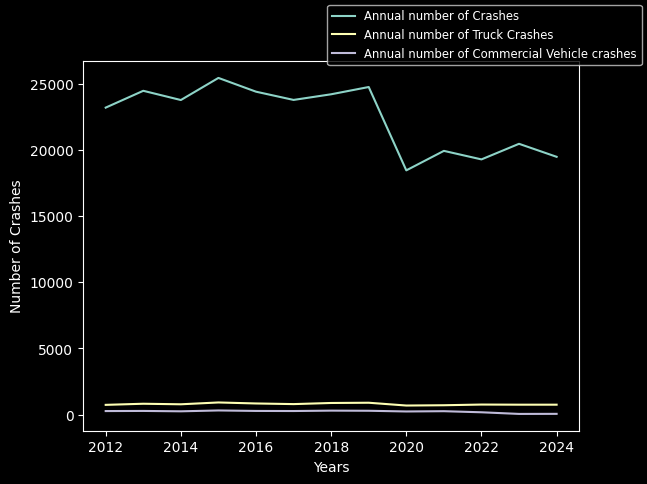

In [17]:
#total number of crashes per year vs. the crashes that involve trucks or commercial vehicles
total, total, total,casecounts = yearstats(summary_table_sorted_year,"CaseYear",years)
Truck_yearsum, Truck_yearmeans, Truck_yearprops,Truck_yearcounts = yearstats(summary_table_sorted_year,"isLargeTruckCrash",years)
Comm_yearsum, Truck_yearmeans, Truck_yearprops,Truck_yearcounts = yearstats(summary_table_sorted_year,"CommercialVehicleCrashInd",years)

plt.plot(years, casecounts, label = "Annual number of Crashes")
plt.plot(years, Truck_yearsum, label = "Annual number of Truck Crashes")
plt.plot(years, Comm_yearsum, label= "Annual number of Commercial Vehicle crashes")

plt.figlegend(fontsize='small')
plt.xlabel("Years")
plt.ylabel("Number of Crashes")
plt.show()
